In [3]:
import os
os.chdir('..')
print(f'Current working directory is {os.getcwd()}')

Current working directory is C:\Users\Gubbz\Documents\NSS\NSS_Projects\open-secrets-skittles


In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from data.Skittles_collection import state_code_df, get_all_districts

In [7]:
States_df = pd.read_csv('data/States_clean_df.csv')

In [9]:
States_df

,State,District,FirstLastP,Party,Raised,Spent,Difference,Outcome,Winner,CRPICO
0,Alabama,1,Jerry Carl (R),R,1971321.50,1859348.91,111972.59,W,1,O
1,Alabama,1,James Averhart (D),D,80094.95,78973.24,1121.71,L,0,O
2,Alabama,2,Barry Moore (R),R,650806.75,669367.70,-18560.95,W,1,O
3,Alabama,2,Phyllis Harvey-Hall (D),D,56049.68,55988.07,61.61,L,0,O
4,Alabama,3,Mike D Rogers (R),R,1193111.43,1218563.76,-25452.33,W,1,I
...,...,...,...,...,...,...,...,...,...,...
846,Wisconsin,7,Tricia Zunker (D),D,1261957.30,1232690.26,29267.04,L,0,C
847,Wisconsin,8,Mike Gallagher (R),R,3202904.74,2841800.71,361104.03,W,1,I
848,Wisconsin,8,Amanda Stuck (D),D,416978.45,399915.94,17062.51,L,0,C
849,Wyoming,1,Liz Cheney (R),R,3003883.34,3060166.78,-56283.44,W,1,I


In [53]:
States_df[['State', 'District']].value_counts()

State      District
Georgia    5           8
Louisiana  5           7
Texas      24          5
           14          4
Tennessee  7           4
                      ..
Colorado   1           1
New York   9           1
           12          1
           13          1
Michigan   9           1
Name: count, Length: 435, dtype: int64

## Part 3: Statistical Modeling
Fit a logistic regression model to see if the amount spent has a statistically significant impact on the probability of winning an election.
Feel free to brainstorm ways to set up your model, but a suggestion to get started would be to calculate, for each candidate, the percentage of to total amount spent in their racby district e that was spent by them and use this as your predictor variable of interest. Hint: you may find the transform method (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html) in combination with groupby useful to find the total spending by race.
Don't forget to include the incumbent variable in your model.
After fitting your model, interpret the meaning of the coefficients you get.

In [57]:
States_df['Percentage_Spent'] = States_df.groupby(['State', 'District'])['Spent'].transform(lambda x: x / x.sum() * 100)
States_df['']

In [59]:
States_df

,State,District,FirstLastP,Party,Raised,Spent,Difference,Outcome,Winner,CRPICO,Percentage_Spent
0,Alabama,1,Jerry Carl (R),R,1971321.50,1859348.91,111972.59,W,1,O,95.925691
1,Alabama,1,James Averhart (D),D,80094.95,78973.24,1121.71,L,0,O,4.074309
2,Alabama,2,Barry Moore (R),R,650806.75,669367.70,-18560.95,W,1,O,92.281295
3,Alabama,2,Phyllis Harvey-Hall (D),D,56049.68,55988.07,61.61,L,0,O,7.718705
4,Alabama,3,Mike D Rogers (R),R,1193111.43,1218563.76,-25452.33,W,1,I,96.747125
...,...,...,...,...,...,...,...,...,...,...,...
846,Wisconsin,7,Tricia Zunker (D),D,1261957.30,1232690.26,29267.04,L,0,C,32.894284
847,Wisconsin,8,Mike Gallagher (R),R,3202904.74,2841800.71,361104.03,W,1,I,87.663452
848,Wisconsin,8,Amanda Stuck (D),D,416978.45,399915.94,17062.51,L,0,C,12.336548
849,Wyoming,1,Liz Cheney (R),R,3003883.34,3060166.78,-56283.44,W,1,I,95.857828


In [63]:
incumbent = States_df[States_df['CRPICO'] == 'I']
open = States_df[States_df['CRPICO'] == 'O']
challenger = States_df[States_df['CRPICO'] == 'C']

In [241]:
States_df['CRPICO'].value_counts()

CRPICO
I    386
C    354
O    111
Name: count, dtype: int64

In [65]:
winners_c = States_df.groupby(['State', 'District'])[['Winner', 'CRPICO']].apply(lambda x: (x['Winner'] == 1) & (x['CRPICO'] == 'C')).sum()
winners_c

12

In [67]:
winners_I = States_df.groupby(['State', 'District'])[['Winner', 'CRPICO']].apply(lambda x: (x['Winner'] == 1) & (x['CRPICO'] == 'I')).sum()
winners_I

373

In [69]:
winners_O = States_df.groupby(['State', 'District'])[['Winner', 'CRPICO']].apply(lambda x: (x['Winner'] == 1) & (x['CRPICO'] == 'O')).sum()
winners_O

48

In [247]:
states_winner_logreg = smf.logit("Winner ~ Percentage_Spent",data = States_df).fit()
spent = np.abs(2362.57)	

logit_p = states_winner_logreg.params['Intercept'] + states_winner_logreg.params['Percentage_Spent']*spent

Optimization terminated successfully.
         Current function value: 0.239538
         Iterations 8


In [249]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

In [251]:
logistic(logit_p)

1.0

In [253]:
fit_df = pd.DataFrame({
    'Percentage_Spent': np.linspace(start = States_df['Percentage_Spent'].min(),
                            stop = States_df['Percentage_Spent'].max(),
                            num = 150)
})

In [255]:
fit_df['fit'] = states_winner_logreg.predict(fit_df)

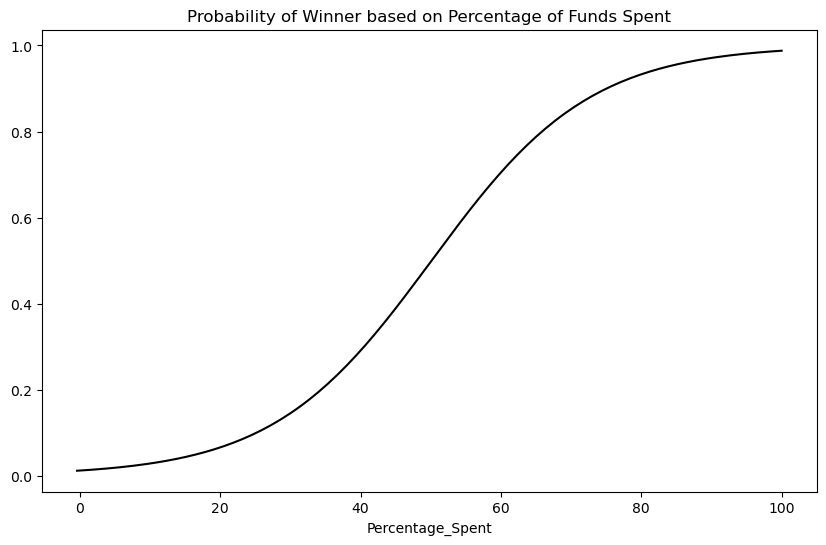

In [257]:
fit_df.plot(x = 'Percentage_Spent',
             y = 'fit',
             legend = False,
             figsize = (10,6),
             color = 'black',
            title = 'Probability of Winner based on Percentage of Funds Spent');

In [259]:
spent_summary = (
    States_df
    .assign(group = pd.qcut(States_df['Percentage_Spent'], 
                            q = 10, 
                            duplicates = 'drop'))
    .groupby('group', observed = False)
    [['Percentage_Spent', 'Winner']]
    .mean()
    .reset_index()
    .rename(columns = {'Winner': 'eprob'})
)
spent_summary

,group,Percentage_Spent,eprob
0,"(-0.393, 1.07]",0.289626,0.000000
1,"(1.07, 5.371]",3.058945,0.000000
2,"(5.371, 17.883]",10.385744,0.011765
3,"(17.883, 34.008]",26.338581,0.176471
4,"(34.008, 51.974]",43.157200,0.435294
5,"(51.974, 68.312]",60.258937,0.623529
6,"(68.312, 86.617]",77.394997,0.870588
7,"(86.617, 96.105]",92.505084,0.988235
8,"(96.105, 100.0]",99.186092,0.994118


In [187]:
spent_summary['fit_prob'] = states_winner_logreg.predict(spent_summary[['Percentage_Spent']])
spent_summary

,group,Percentage_Spent,eprob,fit_prob
0,"(-0.393, 1.07]",0.289626,0.000000,0.012226
1,"(1.07, 5.371]",3.058945,0.000000,0.015554
2,"(5.371, 17.883]",10.385744,0.011765,0.029253
3,"(17.883, 34.008]",26.338581,0.176471,0.109471
4,"(34.008, 51.974]",43.157200,0.435294,0.351164
5,"(51.974, 68.312]",60.258937,0.623529,0.709561
6,"(68.312, 86.617]",77.394997,0.870588,0.917090
7,"(86.617, 96.105]",92.505084,0.988235,0.976686
8,"(96.105, 100.0]",99.186092,0.994118,0.986925


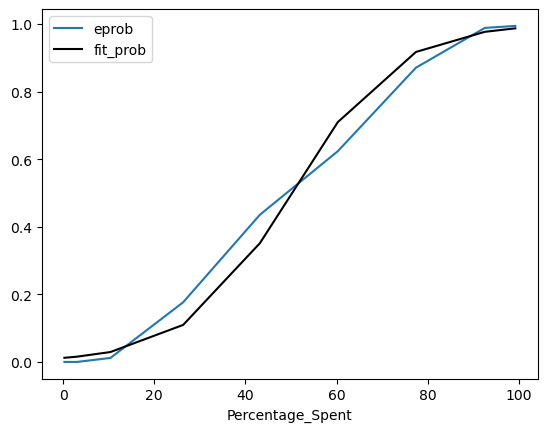

In [191]:
ax = spent_summary.plot(x = 'Percentage_Spent', y = 'eprob')
spent_summary.plot(x = 'Percentage_Spent', y = 'fit_prob',
                color = 'black',
                ax = ax);

In [193]:
spent_summary['elogit'] = np.log(spent_summary['eprob'] / (1 - spent_summary['eprob']))
spent_summary['fit_logit'] = np.log(spent_summary['fit_prob'] / (1 - spent_summary['fit_prob']))
spent_summary

C:\Users\Gubbz\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,group,Percentage_Spent,eprob,fit_prob,elogit,fit_logit
0,"(-0.393, 1.07]",0.289626,0.000000,0.012226,-inf,-4.391848
1,"(1.07, 5.371]",3.058945,0.000000,0.015554,-inf,-4.147788
2,"(5.371, 17.883]",10.385744,0.011765,0.029253,-4.430817,-3.502077
3,"(17.883, 34.008]",26.338581,0.176471,0.109471,-1.540445,-2.096151
4,"(34.008, 51.974]",43.157200,0.435294,0.351164,-0.260283,-0.613925
5,"(51.974, 68.312]",60.258937,0.623529,0.709561,0.504556,0.893253
6,"(68.312, 86.617]",77.394997,0.870588,0.917090,1.906170,2.403455
7,"(86.617, 96.105]",92.505084,0.988235,0.976686,4.430817,3.735109
8,"(96.105, 100.0]",99.186092,0.994118,0.986925,5.129899,4.323907


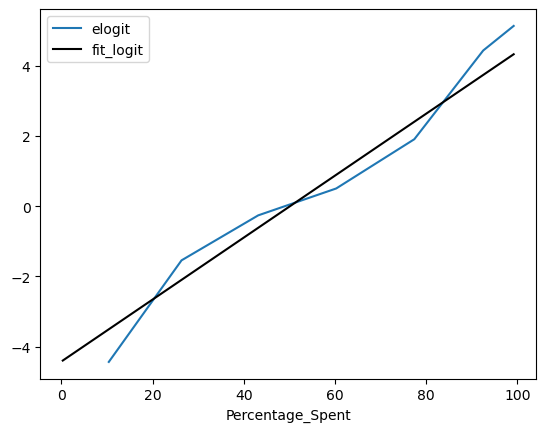

In [195]:
ax = spent_summary.plot(x = 'Percentage_Spent', y = 'elogit')
spent_summary.plot(x = 'Percentage_Spent', y = 'fit_logit',
                color = 'black',
                ax = ax);